In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
numeric = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical = [x for x in df.columns if x not in numeric]
to_encode = ['cp', 'slp', 'caa', 'thall', 'restecg', 'cp']

In [4]:
df = pd.get_dummies(df,columns=to_encode)

In [5]:
norms = df[numeric].copy()

In [6]:
scaler = StandardScaler()

In [7]:
norms = scaler.fit_transform(norms)

In [8]:
df.loc[:, numeric] = norms

C:\Users\silva\AppData\Local\Temp\ipykernel_29920\3959740984.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.9521966  -1.91531289 -1.47415758  0.18017482  0.29046364  0.29046364
  0.18017482 -1.1432911  -0.26098049  0.29046364 -0.04040284 -0.7021358
 -0.59184697  1.06248543  0.40075247 -0.48155814  0.40075247  1.28306308
 -1.25357993  1.61392956  0.5110413  -1.1432911  -1.36386876  0.73161895
 -1.58444641  1.83450721  0.5110413  -0.37126932  1.17277425 -0.15069166
 -1.47415758  1.17277425 -1.1432911  -0.04040284 -0.37126932 -0.92271345
 -0.04040284 -0.04040284  1.17277425  1.17277425 -0.37126932 -0.7021358
 -1.03300228 -0.15069166 -1.69473524 -0.26098049 -1.1432911  -0.81242462
 -0.15069166 -0.15069166 -0.37126932  1.28306308  0.84190778 -1.1432911
  0.9521966  -0.26098049 -0.7021358  -1.03300228 -2.24617937  0.29046364
  1.83450721 -0.04040284 -0.26098049 -1.47415758  0.40075247 -2.13589054
 -0.37126932 -1

In [9]:
for i in df.columns[9:]:
    df[i] = df[i].astype('float64')

In [10]:
df

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_0,...,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2,cp_0,cp_1,cp_2,cp_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0.478391,-0.101730,0,-1.165281,1,-0.724323,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
299,-1.033002,1,-1.234996,0.342756,0,-0.771706,0,0.138373,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
300,1.503641,1,0.706843,-1.029353,1,-0.378132,0,2.036303,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
301,0.290464,1,-0.092738,-2.227533,0,-1.515125,1,0.138373,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
x = df.drop('output', axis=1)
y = df['output']

In [12]:
x

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,cp_0,cp_1,...,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2,cp_0,cp_1,cp_2,cp_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0.478391,-0.101730,0,-1.165281,1,-0.724323,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
299,-1.033002,1,-1.234996,0.342756,0,-0.771706,0,0.138373,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
300,1.503641,1,0.706843,-1.029353,1,-0.378132,0,2.036303,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
301,0.290464,1,-0.092738,-2.227533,0,-1.515125,1,0.138373,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [13]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=30)

In [14]:
from sklearn.metrics import accuracy_score

In [ ]:
from typing import Tuple, Dict

class LogisticNN_2:
    def __init__(self, x: pd.DataFrame, y: pd.DataFrame, echo : bool =True):
        """Create model instance, and initialize weights matrix dimensions.
        Args:
            x (pd.DataFrame): input dataframe.
            y (pd.DataFrame): target dataframe.
            echo (bool, optional): Print loss/acc values. Defaults to True.
        """
        self.X = x.T
        self.Y = np.array(y).reshape(1, y.shape[0])
        self.n_x = self.X.shape[0]
        self.m = self.X.shape[1]
        self.n_h = 2
        self.n_y = self.Y.shape[0]
        self._convergence = 0.000001
        self._echo = echo
        self._trained = False
        self.history = None
        
    def _sigmoid(self, z: np.array) -> np.array:
        """Applies sigmoid activation.

        Args:
            z (np.array): Activation input.

        Returns:
            np.array: Activation output.
        """
        s = 1/(1+np.exp(-z))
        return s
    
    def fit(self, epochs:int = 100, test_set: Tuple[pd.DataFrame, pd.DataFrame] = None, learn_rate: float = 0.0001, history: bool = False):
        """Train the model! If it doesn't work cry a little, and come back in 2mins. Now it works.

        Args:
            epochs (int, optional): Total training iterations. Defaults to 100.
            test_set (Tuple[pd.DataFrame, pd.DataFrame], optional): X_test and y_test. Defaults to None.
            learn_rate (float, optional): Learning rate to use for weights updatating. Defaults to 0.0001.
            history (bool, optional): If you want to track model training history. Defaults to False.
        """
        if not self._trained:
            if history:
                self.history = {'train': [],
                        'test': [],
                        'loss': []}
            
            w1 = np.random.randn(self.n_h,self.n_x)*0.01
            b1 = np.zeros((self.n_h, 1))
            w2 = np.random.randn(self.n_y, self.n_h)*0.01
            b2 = np.zeros((self.n_y, 1))
            self._params = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        
        
        
        for i in range(epochs):
            A2, cache = self._forward_propagate(self.X, self._params)
            
            epsilon = 1e-10
            log_probs = -(self.Y*np.log(np.clip(A2, epsilon, 1-epsilon)) + (1-self.Y)*np.log(np.clip(1-A2, epsilon, 1-epsilon)))
            cost = (1/self.m)*np.sum(log_probs)
            if self.history:
                self.history['loss'].append(cost)
            grads = self._backward_propagate(cache)
            
            
            self._params['w1'] -= learn_rate*grads['dw1']
            self._params['b1'] -= learn_rate*grads['db1']
            self._params['w2'] -= learn_rate*grads['dw2']
            self._params['b2'] -= learn_rate*grads['db2']
            
            
            if self._echo:
                pred = self.predict(self.X, test=False)
                acc = accuracy_score(pred, self.Y.T)
                if test_set:
                    test_pred = self.predict(test_set[0])
                    acc_valid = accuracy_score(test_pred, test_set[1])
                    print(f"EPOCH {i+1}: LOSS [{round(cost,3)}] --- Accuracy Train [{round(acc,3)}] --- Validation [{acc_valid}]")
                    if self.history:
                        self.history['train'].append(acc)
                        self.history['test'].append(acc_valid)
                else:
                    print(f"EPOCH {i+1}: LOSS [{round(cost,3)}] --- Accuracy [{round(acc,3)}]")
        self._A2 = A2
        self._trained = True

    def _forward_propagate(self, x, params):            
        #forward propagate
        Z1 = np.dot(params['w1'], x) + params['b1']
        A1 = self._relu(Z1)
        Z2 = np.dot(params['w2'], A1) + params['b2']
        A2 = self._sigmoid(Z2)
    
        cache = {'z1': Z1,
                 'a1': A1,
                 'z2': Z2,
                 'a2': A2}
        
        return A2, cache

    def _backward_propagate(self, cache: Dict[str: np.array]):
        """Backpropagate the loss, and return the gradients.

        Args:
            cache (_type_): Forward prob outputs.

        Returns:
            Dict[str: np.array]: Gradients. 
        """
        W1 = self._params['w1']
        W2 = self._params['w2']
        
        A1 = cache['a1']
        A2 = cache['a2']
        
        dZ2 = A2 - self.Y
        dW2 = (1/self.m)*np.dot(dZ2, A1.T)
        db2 = (1/self.m)*np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2)*(A1 > 0)
        dW1 = (1/self.m)*np.dot(dZ1, self.X.T)
        db1 = (1/self.m)*np.sum(dZ1, axis=1, keepdims=True)
        
        grads = {'dw1': dW1,
                 'db1': db1,
                 'dw2': dW2,
                 'db2': db2}
        
        return grads
    
    def predict(self, x: pd.DataFrame, threshold: float =0.5, test: bool =True) -> np.array:
        """Predict the values for y using input x
        Args:
            x (pd.DataFrame): Input dataframe.
            threshold (float, optional): Threshold for sigmoid. Defaults to 0.5.
            test (bool, optional): if its the test_set. Defaults to True.

        Returns:
            np.array: _description_
        """
        if test:
            A2, cache = self._forward_propagate(x.T, self._params)
        else:
            A2, cache = self._forward_propagate(x, self._params)
            
        predictions = np.where(A2>=threshold, 1, 0)
        return predictions.ravel()

In [16]:
#run this to skip trainign and load pre-trained model
with open('saved_models/model_save1.pkl', 'rb') as file:
    model = pickle.load(file)

In [27]:
#initialize this to train new model
model = LogisticNN_2(train_x, train_y)

In [ ]:
model.fit(test_set=(test_x,test_y), epochs=2500, learn_rate=0.00075)

In [17]:
import matplotlib.pyplot as plt

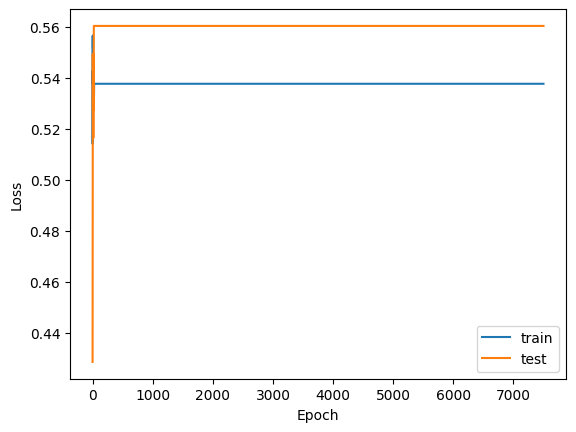

In [21]:
pd.DataFrame(model.history).iloc[:,:2].plot()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.show()

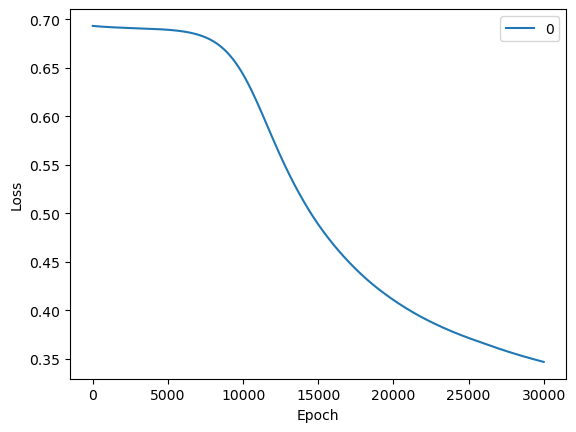

In [18]:
pd.DataFrame(model.history['loss']).plot()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.show()


In [19]:
pred = model.predict(test_x)

In [20]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model2 = LogisticRegression()

In [23]:
model2.fit(train_x, train_y)

LogisticRegression()

In [24]:
pred2 = model2.predict(test_x)

In [25]:
print(classification_report(pred2, test_y))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

